A one-way between subjects ANOVA was conducted to compare the effect of Gini coefficient on academic achievements in countries with low Gini coefficient, average Gini coefficient and high Gini coefficient. (надо добавить, по каким критериям группировала) There was not a significant effect of Gini coefficient on achievement in Reading test at the p < .05 level for the three conditions (F(2, 68) = 4.02, p = 0.02).  Post hoc comparisons using Tukey HSD test indicated that the mean score for the low Gini coefficient (M = 471.47, SD = 45.39) was significantly different than the high Gini coefficient (M =424.24, SD =60.47 )

In [3]:
%matplotlib inline
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
gdp_gini_subset = pd.read_csv('wb_data2.csv', sep='\t')
pisa = pd.read_csv('pisa_data.csv', sep='\t')

In [5]:
gdp_gini_15 = gdp_gini_subset[gdp_gini_subset.date == '2015-01-01' ]
pisa_15 = pisa[pisa.date == '2015-01-01']
print gdp_gini_15.describe()

                 gdp        gini
count     217.000000  217.000000
mean    19820.341600   38.958111
std     22371.647864    8.142349
min       666.958172   24.090000
25%      3861.989229   32.840000
50%     11504.748238   37.850000
75%     27177.174080   44.050000
max    127522.671145   63.380000


In [33]:
gdp_gini_12 = gdp_gini_subset[gdp_gini_subset.date == '2012-01-01' ]
print gdp_gini_15.describe()

                 gdp        gini
count     217.000000  217.000000
mean    18445.523045   39.079862
std     21986.344893    8.112994
min       664.801780   24.740000
25%      3593.228034   33.100000
50%     10472.108534   37.890000
75%     24657.878980   43.880000
max    127610.208824   63.380000


In [34]:
gdp_gini_9 = gdp_gini_subset[gdp_gini_subset.date == '2009-01-01' ]
print gdp_gini_9.describe()

                 gdp        gini
count     217.000000  216.000000
mean    16522.923503   39.141065
std     19762.413515    8.032921
min       569.535006   24.830000
25%      3144.974848   33.155000
50%      9010.325505   37.990000
75%     22191.174603   43.922500
max    127522.671145   63.380000


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


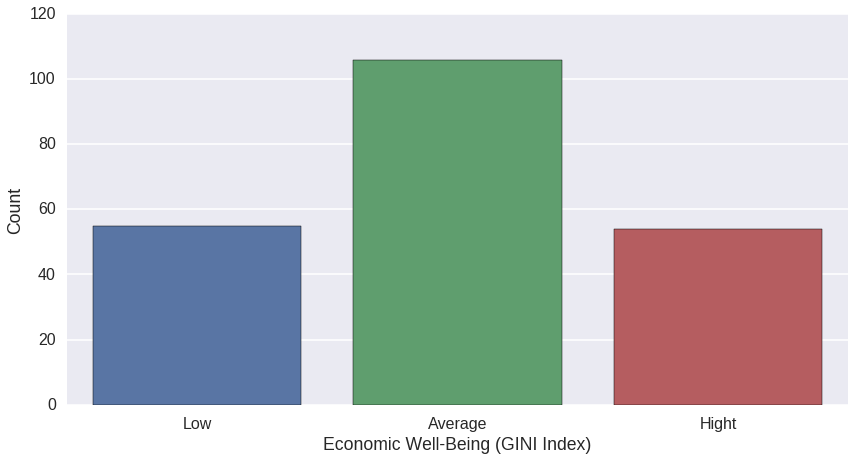

In [6]:
gdp_bins  = [667, 3862, 27177, 127522]
gini_bins = [24,  33,   44,    63]
group_names = ['Low', 'Average', 'Hight']

gdp_gini_15['gdp_categories'] = pd.cut(gdp_gini_15['gdp'], gdp_bins, labels=group_names)
gdp_gini_15['gini_categories'] = pd.cut(gdp_gini_15['gini'], gini_bins, labels=group_names)

sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=gdp_gini_15)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

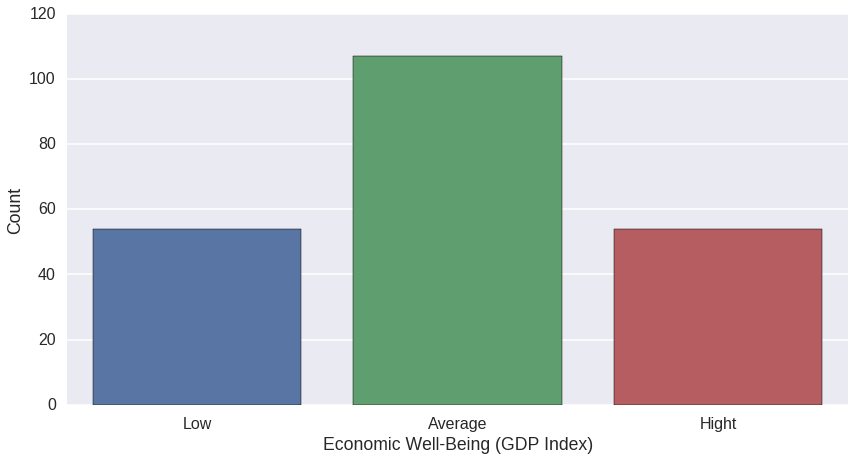

In [7]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=gdp_gini_15)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Index)')
plt.show()

In [8]:
df_15 = pd.merge(gdp_gini_15, pisa_15, how='right', on=['iso_code','country','date'])
print df_15.head()

  iso_code               country        date           gdp   gini  \
0       AL               Albania  2015-01-01  11504.748238  28.96   
1       AE  United Arab Emirates  2015-01-01  70245.932500  42.67   
2       AR             Argentina  2015-01-01  20337.715945  42.67   
3       AU             Australia  2015-01-01  46475.927752  34.94   
4       AT               Austria  2015-01-01  49419.330062  30.48   

  gdp_categories gini_categories      Math   Reading  
0        Average             Low  413.1570  405.2588  
1          Hight         Average  427.4827  433.5423  
2        Average         Average  409.0333  425.3031  
3          Hight         Average  493.8962  502.9006  
4          Hight             Low  496.7423  484.8656  


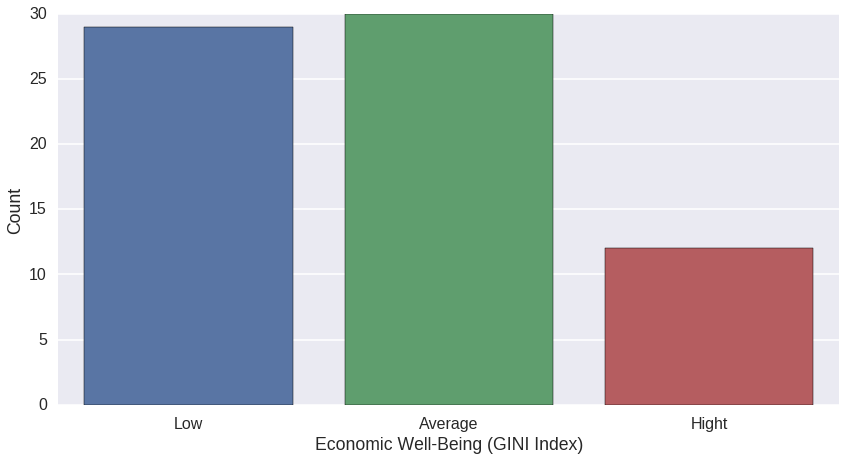

In [9]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=df_15)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

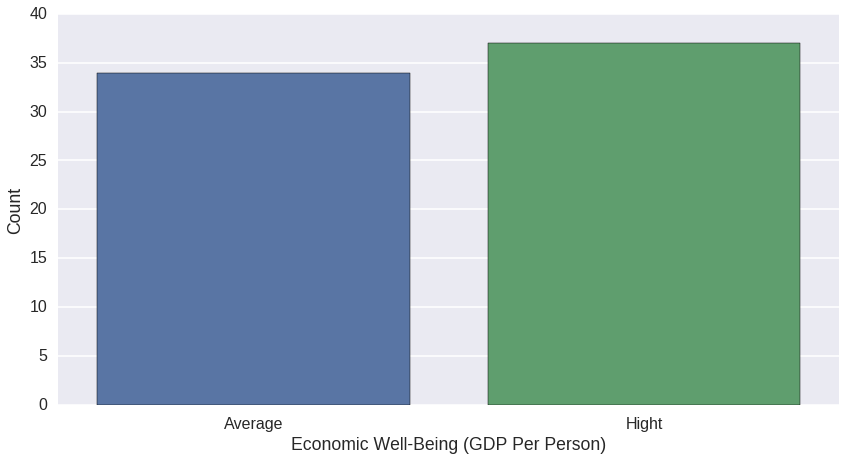

In [10]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=df_15)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

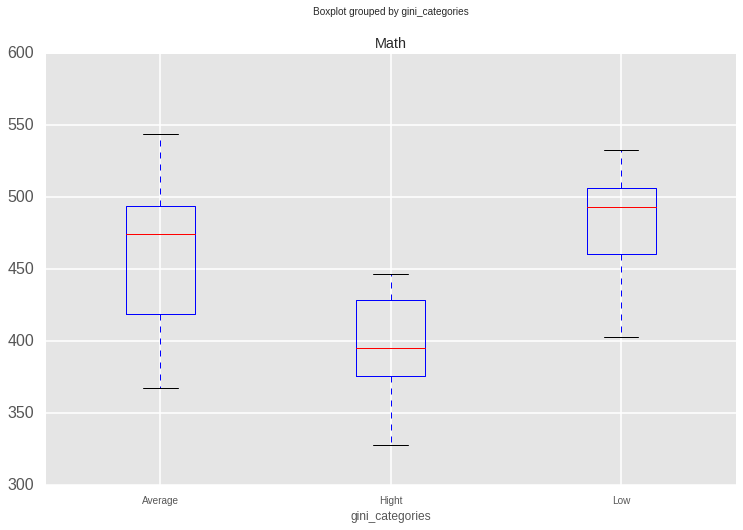

In [11]:
import matplotlib
matplotlib.style.use('ggplot')
df_15.boxplot('Math', by='gini_categories', figsize=(12,8))

In [12]:
mod = ols('Math ~ gini_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2, )
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                        sum_sq  df         F    PR(>F)
gini_categories   28997.478063   2  5.570998  0.005747
Residual         176972.652796  68       NaN       NaN
0.140784869837


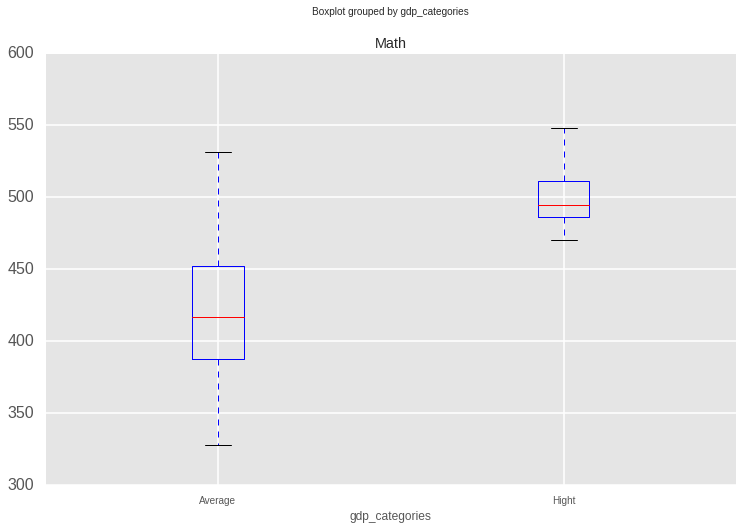

In [13]:
df_15.boxplot('Math', by='gdp_categories', figsize=(12,8))

In [14]:
mod = ols('Math ~ gdp_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                       sum_sq  df          F        PR(>F)
gdp_categories   92737.144802   1  56.510591  1.523553e-10
Residual        113232.986057  69        NaN           NaN
0.450245598307


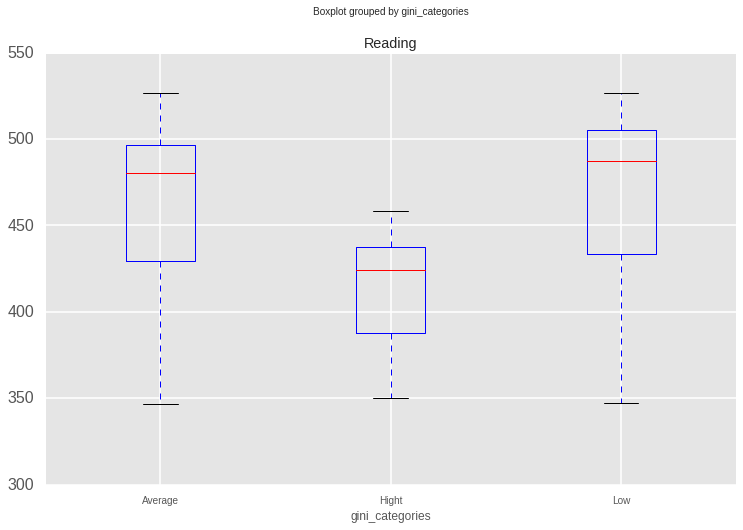

In [15]:
df_15.boxplot('Reading', by='gini_categories', figsize=(12,8))

In [16]:
df_15.groupby('gini_categories').describe()

Math     Reading            gdp       gini
gini_categories                                                        
Average         count   30.000000   30.000000      30.000000  30.000000
                mean   461.846040  461.778653   33544.996428  37.693333
                std     47.215589   47.238744   24160.323006   3.123662
                min    366.818000  346.549000    6034.259949  33.100000
                25%    418.607425  429.180700   18771.052885  35.240000
                50%    474.026450  480.199850   28941.531762  36.580000
                75%    493.652250  496.595425   37077.802246  40.585000
                max    543.807800  526.667800  107024.284211  42.780000
Hight           count   12.000000   12.000000      12.000000  12.000000
                mean   416.756025  424.235192   25936.075671  47.984167
                std     71.777804   60.470043   22578.520179   3.022995
                min    327.702000  349.859300   12529.228231  44.050000
                25%    375.629975  387.590475   14183.486646  45.920000
                50%    394.948600  424.090850   15747.469911  47.640000
                75%    428.531000  437.576375   24336.182531  50.497500
                max    564.189700  535.100200   86128.172508  53.500000
Low             count   29.000000   29.000000      29.000000  29.000000
                mean   474.934121  471.474290   38814.946723  29.129655
                std     44.581396   45.393867   23746.428492   2.478023
                min    361.534000  347.125900    5054.042204  25.590000
                25%    459.816000  433.616600   25044.878009  26.940000
                50%    492.478500  487.250100   37948.919621  28.960000
                75%    505.971300  505.215900   47998.862695  31.930000
                max    532.439900  526.424700  127500.756215  32.570000

In [17]:
mod = ols('Reading ~ gini_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2, transform='log')
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                        sum_sq  df         F   PR(>F)
gini_categories   19236.367313   2  4.021542  0.02235
Residual         162633.244522  68       NaN      NaN
0.105770101552


In [18]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                Reading   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4.022
Date:                Sat, 07 Oct 2017   Prob (F-statistic):             0.0223
Time:                        06:48:11   Log-Likelihood:                -375.39
No. Observations:                  71   AIC:                             756.8
Df Residuals:                      68   BIC:                             763.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df_15['Reading'], df_15['gini_categories'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1 group2 meandiff  lower    upper  reject
-----------------------------------------------
Average Hight  -37.5435 -77.568   2.4811 False 
Average  Low    9.6956  -20.8198  40.211 False 
 Hight   Low   47.2391   7.0179  87.4603  True 
-----------------------------------------------
['Average' 'Hight' 'Low']


group1,group2,meandiff,lower,upper,reject
Average,Hight,-37.5435,-77.568,2.4811,False
Average,Low,9.6956,-20.8198,40.211,False
Hight,Low,47.2391,7.0179,87.4603,True


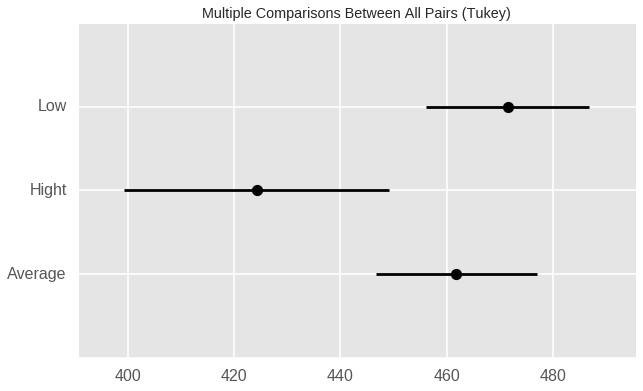

In [20]:
tukey = pairwise_tukeyhsd(endog=df_15['Reading'],     # Data
                          groups=df_15['gini_categories'],   # Groups
                          alpha=0.05)
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
tukey.summary()

In [45]:
from statistics import mean, stdev
from math import sqrt


print df_15.groupby('gini_categories').mean()
print df_15.groupby('gini_categories').std()

#df_15_h = df_15[[df_15.gini_categories == 'Hight', 'Reading']].to_numeric()
#df_15_l = df_15[df_15.gini_categories == 'Low', 'Reading'].to_numeric()
#df_15_a = df_15[df_15.gini_categories == 'Average'].to_numeric()
#df = df_15['gini_categories' == 'High']
#print df_15_a.head()

cohens_d_lh = (424.23 - 471.47) / (sqrt((60.47 ** 2 + 45.39 ** 2) / 2))
print cohens_d_lh

                          gdp       gini        Math     Reading
gini_categories                                                 
Average          33544.996428  37.693333  461.846040  461.778653
Hight            25936.075671  47.984167  416.756025  424.235192
Low              38814.946723  29.129655  474.934121  471.474290
                          gdp      gini       Math    Reading
gini_categories                                              
Average          24160.323006  3.123662  47.215589  47.238744
Hight            22578.520179  3.022995  71.777804  60.470043
Low              23746.428492  2.478023  44.581396  45.393867
-0.883579466047


In [26]:
aov_pyvttbl = df.anova1way('Reading', 'gini_categories')
print aov_pyvttbl

TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

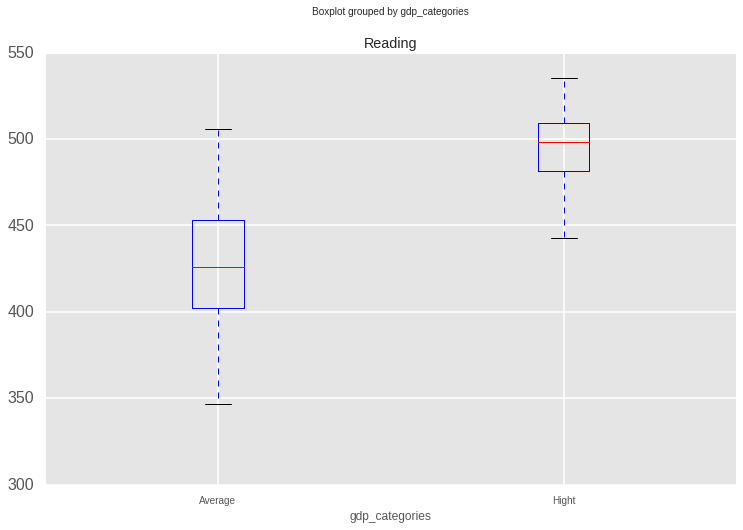

In [79]:
df_15.boxplot('Reading', by='gdp_categories', figsize=(12,8))

In [80]:
mod = ols('Reading ~ gdp_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                       sum_sq  df          F        PR(>F)
gdp_categories   80803.712234   1  55.166541  2.222763e-10
Residual        101065.899601  69        NaN           NaN
0.444294741813


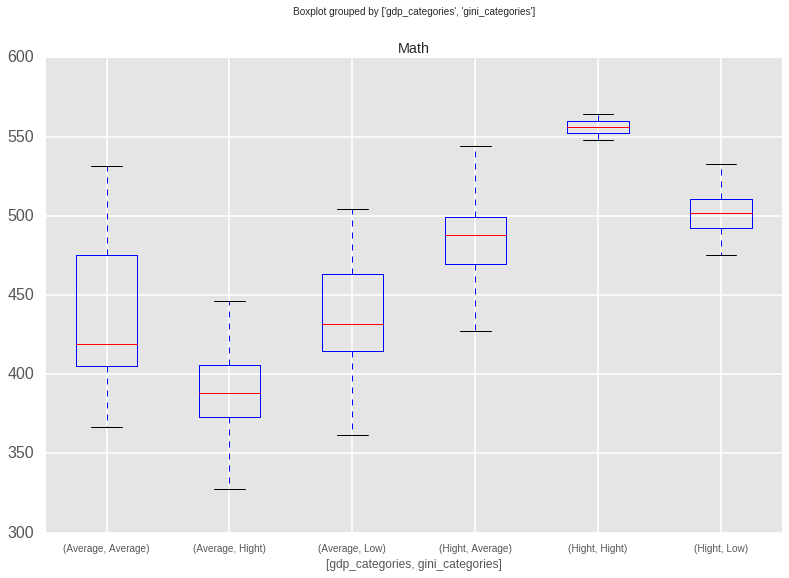

In [81]:
df_15.boxplot('Math', by=['gdp_categories', 'gini_categories'])

In [87]:
mod = ols('Reading ~ gdp_categories', data=df_15).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print aov_table
print esq_sm

                       sum_sq  df          F        PR(>F)
gdp_categories   80803.712234   1  55.166541  2.222763e-10
Residual        101065.899601  69        NaN           NaN
0.444294741813


In [88]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

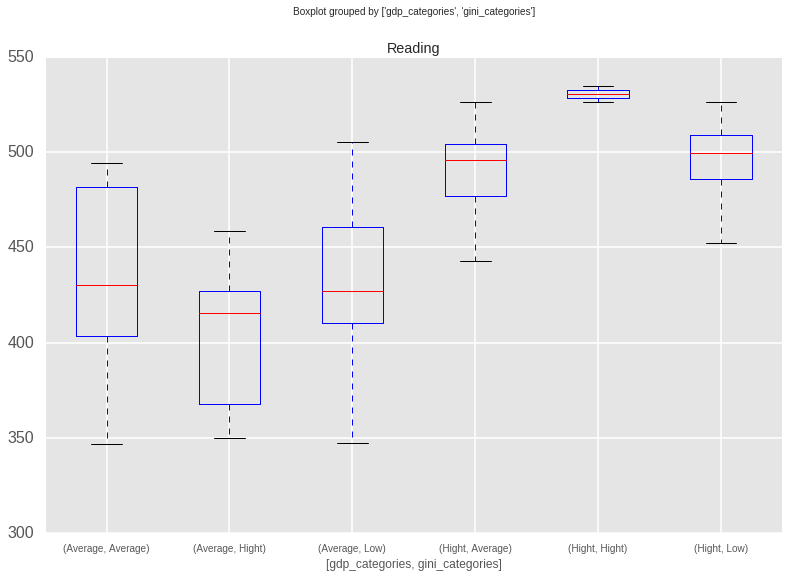

In [89]:
df_15.boxplot('Reading', by=['gdp_categories', 'gini_categories'])

In [90]:
formula = 'Math ~ C(gdp_categories) + C(gini_categories) + C(gdp_categories):C(gini_categories)'
model = ols(formula, df_15).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                                            sum_sq  df          F  \
C(gdp_categories)                     68849.105330   1  50.651665   
C(gini_categories)                     5109.438592   2   1.879484   
C(gdp_categories):C(gini_categories)  19771.232868   2   7.272759   
Residual                              88352.314598  65        NaN   

                                            PR(>F)    eta_sq  omega_sq  
C(gdp_categories)                     1.077397e-09  0.378121  0.367910  
C(gini_categories)                    1.608719e-01  0.028061  0.013034  
C(gdp_categories):C(gini_categories)  1.411476e-03  0.108584  0.092960  
Residual                                       NaN       NaN       NaN  


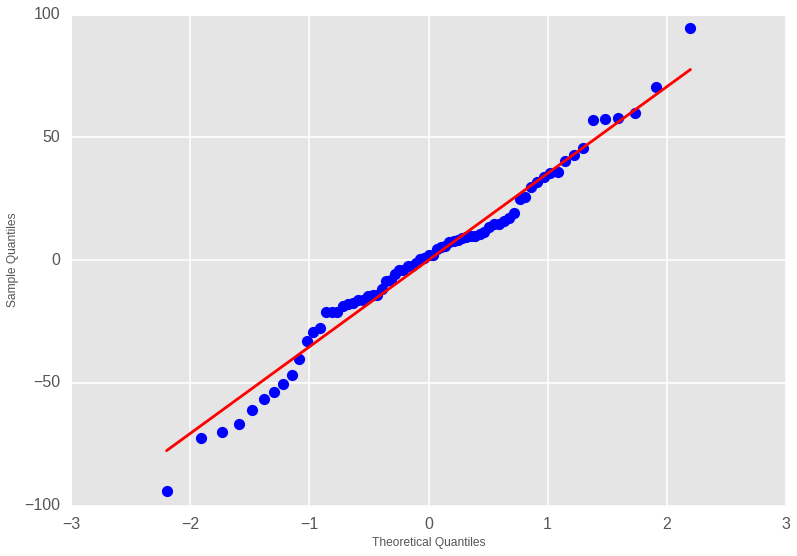

In [91]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()